# Anomaly Detection Project

Project Scenario

Hello,

I have some questions for you that I need to be answered before the board meeting Friday afternoon. I need to be able to speak to the following questions. I also need a single slide that I can incorporate into my existing presentation (Google Slides) that summarizes the most important points. My questions are listed below; however, if you discover anything else important that I didn’t think to ask, please include that as well.


1. Which lesson appears to attract the most traffic consistently across cohorts (per program)?
2. Is there a cohort that referred to a lesson significantly more than other cohorts seemed to gloss over?
3. Are there students who, when active, hardly access the curriculum? If so, what information do you have about these students?
4. Is there any suspicious activity, such as users/machines/etc accessing the curriculum who shouldn’t be? Does it appear that any web-scraping is happening? Are there any suspicious IP addresses?
5. At some point in 2019, the ability for students and alumni to access both curriculums (web dev to ds, ds to web dev) should have been shut off. Do you see any evidence of that happening? Did it happen before?
6. What topics are grads continuing to reference after graduation and into their jobs (for each program)?
7. Which lessons are least accessed?
8. Anything else I should be aware of?


Thank you,

---

Other info:

- To turn in your project, email datascience@codeup.com with the subject line "Anomaly Detection Project"
- To get 100 on this project you only need to answer 5 out of the 7 questions (along with the other deliverables listed below i.e. slide, your notebook, etc).
- Submit a link to a final notebook on GitHub that asks and answers questions - document the work you do to justify findings
- Compose an email with the answers to the questions/your findings, and in the email, include the link to your notebook in GitHub and attach your slide.
- You will not present this, so be sure that the details you need your leader to convey/understand are clearly communicated in the email.
- Your slide should be like an executive summary and be in form to present.
- Continue to use best practices of acquire.py, prepare.py, etc.
- Since there is no modeling to be done for this project, there is no need to split the data into train/validate/test
- The cohort schedule is in the SQL database, and alumni.codeup.com has info as well.

# Answers to Questions- Bottom Line Up Front
### Question 1
Which lesson appears to attract the most traffic consistently across cohorts (per program)? <br>
#### Highest traffic lesson for each cohort <br> 
'PHP Full Srack Web Dev'  : javascript-i <br>
'Java Full Stack Web Dev' : javascript-i <br>
'Data Science'            : classification/overview <br>
'Front End Web Dev'       : introduction.html (I am assuming the others are not lessons but were accessed for technical reasons) <br>
### Question 2
Which lessons are least accessed? <br>
#### The lists of pages with the least amount of accessions are given in the section work
- Out of 710 pages, 141 of those pages were only accessed once by 'PHP Full Srack Web Dev'
- Out of 1913 pages, 420 of those pages were only accessed once by 'Java Full Stack Web Dev'
- Out of 683 pages, 104 of those pages were only accessed once by 'Data Science'
- For front end web dev, all were low. Content/html-css had two accesses and the other three pages only had one access.
- Many of the least commonly accessed pages covered basics like functions or lists. These topics are reinforced throught the course, and a google search would probably give better answers to specific questions than a broad introduction page. When students encounter a bug, they will probably google the error message instead of returning to the curriculum.
### Question 3
What topics are grads continuing to reference after graduation and into their jobs (for each program)? <br>
#### Alumni are continuing to reference the following topics after graduation:
- 'PHP Full Srack Web Dev' alumni are coming back to javascript-i
- 'Java Full Stack Web Dev' alumni are coming back to javascript-i
- 'Data Science' alumni are coming back to sql/mysql-overview
- 'Front End Web Dev' accessions all seem to be after graduation
### Question 4
Are there students who, when active, hardly access the curriculum? If so, what information do you have about these students? <br>
#### Users who only accessed the curiculum once had an average enrollment period of less than one month.
### Question 5
Is there any suspicious activity, such as users/machines/etc accessing the curriculum who shouldn’t be? Does it appear that any web-scraping is happening? Are there any suspicious IP addresses? <br>
- There are two anomalous ip addresses, which is defined as activity more than three standard deviations above the mean.
- The likely explanation for the two anomalous ip addresses is that they belong to shared computers being used by multiple students over multiple cohorts.
- I would recommend determining if these two machines belong to the school.



# Plan
This project will be conducted in accordance with a modified data science pipeline. <br>
The model step is replaced with a Questions step. <br> <br>
Acquire -> Prepare -> Explore -> Questions -> Deliver

# Acquire

In [66]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import datetime as dt

import statistics as stat

import env
import wrangle
import os

In [2]:
df = wrangle.get_logs()
df.head()

,Unnamed: 0,date,time,path,user_id,cohort_id,ip,id,name,slack,start_date,end_date,created_at,updated_at,deleted_at,program_id
0,0,2018-01-26,09:55:03,/,1,8.0,97.105.19.61,8.0,Hampton,#hampton,2015-09-22,2016-02-06,2016-06-14 19:52:26,2016-06-14 19:52:26,NaN,1.0
1,1,2018-01-26,09:56:02,java-ii,1,8.0,97.105.19.61,8.0,Hampton,#hampton,2015-09-22,2016-02-06,2016-06-14 19:52:26,2016-06-14 19:52:26,NaN,1.0
2,2,2018-01-26,09:56:05,java-ii/object-oriented-programming,1,8.0,97.105.19.61,8.0,Hampton,#hampton,2015-09-22,2016-02-06,2016-06-14 19:52:26,2016-06-14 19:52:26,NaN,1.0
3,3,2018-01-26,09:56:06,slides/object_oriented_programming,1,8.0,97.105.19.61,8.0,Hampton,#hampton,2015-09-22,2016-02-06,2016-06-14 19:52:26,2016-06-14 19:52:26,NaN,1.0
4,4,2018-01-26,09:56:24,javascript-i/conditionals,2,22.0,97.105.19.61,22.0,Teddy,#teddy,2018-01-08,2018-05-17,2018-01-08 13:59:10,2018-01-08 13:59:10,NaN,2.0


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 900223 entries, 0 to 900222
Data columns (total 16 columns):
 #   Column      Non-Null Count   Dtype  
---  ------      --------------   -----  
 0   Unnamed: 0  900223 non-null  int64  
 1   date        900223 non-null  object 
 2   time        900223 non-null  object 
 3   path        900222 non-null  object 
 4   user_id     900223 non-null  int64  
 5   cohort_id   847330 non-null  float64
 6   ip          900223 non-null  object 
 7   id          847330 non-null  float64
 8   name        847330 non-null  object 
 9   slack       847330 non-null  object 
 10  start_date  847330 non-null  object 
 11  end_date    847330 non-null  object 
 12  created_at  847330 non-null  object 
 13  updated_at  847330 non-null  object 
 14  deleted_at  0 non-null       float64
 15  program_id  847330 non-null  float64
dtypes: float64(4), int64(2), object(10)
memory usage: 109.9+ MB


### Takeaways from Acquire
- Date and time are separate columns
- Temporal columns are strings
- Program id but no program names
- Some columns do not appear useful (deleted_at is full of nulls, Unnamed: 0 seems to match the index)
- Some null values

# Prepare

In [4]:
df = wrangle.prepare_df(df)
df.head()

,date,time,path,user_id,cohort_id,ip,id,name,slack,start_date,end_date,created_at,updated_at,program_id,course_name,course_subdomain,hour,weekday
datetime,,,,,,,,,,,,,,,,,,
2018-01-26 09:55:03-06:00,2018-01-26,09:55:03,/,1,8.0,97.105.19.61,8.0,Hampton,#hampton,2015-09-22,2016-02-06,2016-06-14 19:52:26,2016-06-14 19:52:26,1.0,PHP Full Srack Web Dev,php,9,Friday
2018-01-26 09:56:02-06:00,2018-01-26,09:56:02,java-ii,1,8.0,97.105.19.61,8.0,Hampton,#hampton,2015-09-22,2016-02-06,2016-06-14 19:52:26,2016-06-14 19:52:26,1.0,PHP Full Srack Web Dev,php,9,Friday
2018-01-26 09:56:05-06:00,2018-01-26,09:56:05,java-ii/object-oriented-programming,1,8.0,97.105.19.61,8.0,Hampton,#hampton,2015-09-22,2016-02-06,2016-06-14 19:52:26,2016-06-14 19:52:26,1.0,PHP Full Srack Web Dev,php,9,Friday
2018-01-26 09:56:06-06:00,2018-01-26,09:56:06,slides/object_oriented_programming,1,8.0,97.105.19.61,8.0,Hampton,#hampton,2015-09-22,2016-02-06,2016-06-14 19:52:26,2016-06-14 19:52:26,1.0,PHP Full Srack Web Dev,php,9,Friday
2018-01-26 09:56:24-06:00,2018-01-26,09:56:24,javascript-i/conditionals,2,22.0,97.105.19.61,22.0,Teddy,#teddy,2018-01-08,2018-05-17,2018-01-08 13:59:10,2018-01-08 13:59:10,2.0,Java Full Stack Web Dev,java,9,Friday


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 900223 entries, 2018-01-26 09:55:03-06:00 to 2021-04-21 16:44:39-05:00
Data columns (total 18 columns):
 #   Column            Non-Null Count   Dtype         
---  ------            --------------   -----         
 0   date              900223 non-null  object        
 1   time              900223 non-null  object        
 2   path              900222 non-null  object        
 3   user_id           900223 non-null  int64         
 4   cohort_id         847330 non-null  float64       
 5   ip                900223 non-null  object        
 6   id                847330 non-null  float64       
 7   name              847330 non-null  object        
 8   slack             847330 non-null  object        
 9   start_date        847330 non-null  datetime64[ns]
 10  end_date          847330 non-null  datetime64[ns]
 11  created_at        847330 non-null  object        
 12  updated_at        847330 non-null  object        
 13  program_id   

### Takeaways from Prepare
- Date and Time columins combined into datetime
- datetime, start_date, end_date converted into datetime type
- Dropped Unnamed: 0 and deleted_at columns
- Added column for program names matching program_id
- Add hour and weekday columns

# Explore

<AxesSubplot:ylabel='Frequency'>

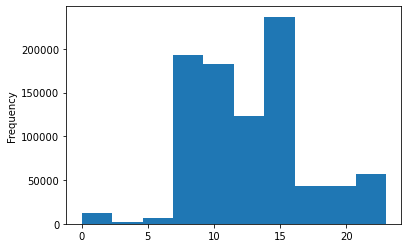

In [6]:
df.hour.plot(kind='hist')

<AxesSubplot:>

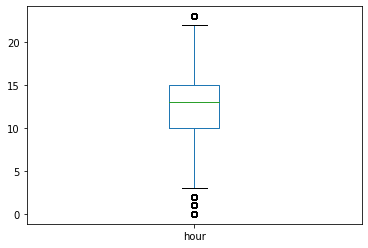

In [7]:
# At least one late night outlier
# At least three early morning outliers
df.hour.plot(kind='box')

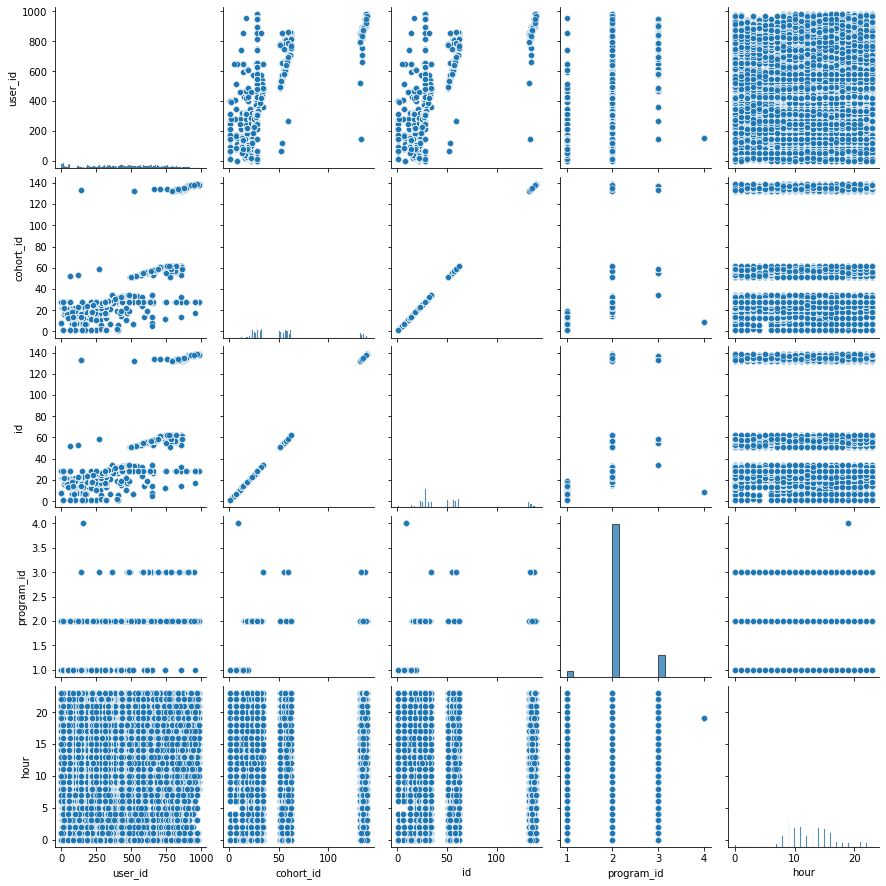

In [8]:
sns.pairplot(df)

In [9]:
# Big difference in traffic by cohort
df.name.value_counts()

Staff         84031
Ceres         40730
Zion          38096
Jupiter       37109
Fortuna       36902
Voyageurs     35636
Ganymede      33844
Apex          33568
Deimos        32888
Darden        32015
Teddy         30926
Hyperion      29855
Betelgeuse    29356
Ulysses       28534
Europa        28033
Xanadu        27749
Bayes         26538
Wrangell      25586
Andromeda     25359
Kalypso       23691
Curie         21582
Yosemite      20743
Bash          17713
Luna          16623
Marco         16397
Easley        14715
Lassen         9587
Arches         8890
Florence       8562
Sequoia        7444
Neptune        7276
Olympic        4954
Kings          2845
Pinnacles      2158
Hampton        1712
Oberon         1672
Quincy         1237
Niagara         755
Mammoth         691
Glacier         598
Joshua          302
Ike             253
Badlands         93
Franklin         72
Apollo            5
Denali            4
Everglades        1
Name: name, dtype: int64

In [10]:
# Front end web dev has an unusually low count compared to other courses
# Perhaps it is for staff? A one-off? Something else?
df.course_name.value_counts()

Java Full Stack Web Dev    713365
Data Science               103412
PHP Full Srack Web Dev      30548
Front End Web Dev               5
Name: course_name, dtype: int64

In [11]:
# path is the page for a lesson
# some lessons are frequently accessed, and some lessons are rarely accessed
df.path.value_counts()

/                                  50313
search/search_index.json           19519
javascript-i                       18983
toc                                18297
java-iii                           13733
                                   ...  
content/examples/php/while.html        1
interview-questions                    1
students/743/notes                     1
6-stats                                1
10-nlp/entity-labeling                 1
Name: path, Length: 2313, dtype: int64

In [12]:
# Number of unique lessons
df.path.nunique()

2313

In [13]:
# Many users have multiple ip addresses
len(df.user_id.unique()) / len(df.ip.unique())

0.17736394865304647

### Takeaways from Explore
- Many numeric columns have lots of big outliers.
- Traffic is heaviest during late afternoon and eary evening.
- Some lessons are frequently accessed, while others are rarely accessed.
- More ip addresses than users, showing that a single user can have multiple computers.
- Front end web dev has a very small amount of records compared to the other programs.

# Questions

### 1. Which lesson appears to attract the most traffic consistently across cohorts (per program)?

<AxesSubplot:title={'center':'Top 10 Pages for All Programs'}>

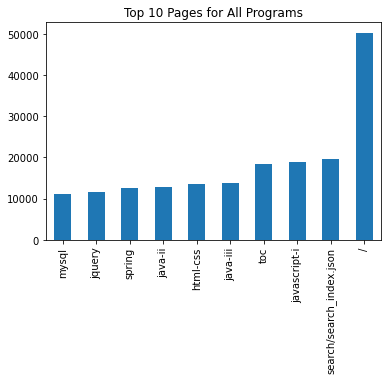

In [14]:
# most traffic across all programs
df.path.value_counts().sort_values().tail(10).plot.bar(title='Top 10 Pages for All Programs')

In [15]:
# Most traffic for 'PHP Full Srack Web Dev'
path_df = df[df.course_name == 'PHP Full Srack Web Dev']
path_df = wrangle.value_counts_and_frequencies(path_df.path)
path_df.head(10)

,count,probability
/,1681,0.055028
index.html,1011,0.033095
javascript-i,736,0.024093
html-css,542,0.017743
spring,501,0.016400
java-iii,479,0.015680
java-ii,454,0.014862
java-i,444,0.014535
javascript-ii,429,0.014043
appendix,409,0.013389


In [16]:
# Most traffic for 'Java Full Stack Web Dev'
path_df = df[df.course_name == 'Java Full Stack Web Dev']
path_df = wrangle.value_counts_and_frequencies(path_df.path)
path_df.head(10)

,count,probability
/,35814,0.050204
javascript-i,17457,0.024471
toc,17428,0.024431
search/search_index.json,15212,0.021324
java-iii,12683,0.017779
html-css,12569,0.017619
java-ii,11719,0.016428
spring,11376,0.015947
jquery,10693,0.014990
mysql,10318,0.014464


In [17]:
# Most traffic for 'Data Science'
path_df = df[df.course_name == 'Data Science']
path_df = wrangle.value_counts_and_frequencies(path_df.path)
path_df.head(10)

,count,probability
/,8358,0.080822
search/search_index.json,2203,0.021303
classification/overview,1785,0.017261
1-fundamentals/modern-data-scientist.jpg,1655,0.016004
1-fundamentals/AI-ML-DL-timeline.jpg,1651,0.015965
1-fundamentals/1.1-intro-to-data-science,1633,0.015791
classification/scale_features_or_not.svg,1590,0.015375
fundamentals/AI-ML-DL-timeline.jpg,1443,0.013954
fundamentals/modern-data-scientist.jpg,1438,0.013906
sql/mysql-overview,1424,0.013770


In [18]:
# Most traffic for 'Front End Web Dev'
path_df = df[df.course_name == 'Front End Web Dev']
path_df = wrangle.value_counts_and_frequencies(path_df.path)
path_df.head(10)

,count,probability
content/html-css,2,0.4
content/html-css/introduction.html,1,0.2
content/html-css/gitbook/images/favicon.ico,1,0.2
/,1,0.2


/ is Codeup front page <br> 
favicon.ico is a shortcut or bookmark icon, I can't tell if this is from the browser of is a lesson <br> <br>
### Highest traffic lesson for each cohort <br> <br>
'PHP Full Srack Web Dev'  : javascript-i <br>
'Java Full Stack Web Dev' : javascript-i <br>
'Data Science'            : classification/overview <br>
'Front End Web Dev'       : introduction.html (I am assuming the others are not lessons but were accessed for technical reasons) <br>

### 2. Which lessons are least accessed?

In [83]:
# Least traffic for 'PHP Full Srack Web Dev'
path_df = df[df.course_name == 'PHP Full Srack Web Dev']
path_df = wrangle.value_counts_and_frequencies(path_df.path)
path_df

,count,probability
/,1681,0.055028
index.html,1011,0.033095
javascript-i,736,0.024093
html-css,542,0.017743
spring,501,0.016400
...,...,...
content/examples/php/internal_functions.php,1,0.000033
4-python/5-functions,1,0.000033
mysql/jdbc-statements,1,0.000033
content/examples/html/forms.html,1,0.000033


In [84]:
path_df.value_counts()

count  probability
1      0.000033       141
2      0.000065        65
3      0.000098        26
7      0.000229        25
6      0.000196        23
                     ... 
61     0.001997         1
122    0.003994         1
62     0.002030         1
64     0.002095         1
1681   0.055028         1
Length: 157, dtype: int64

In [85]:
# Out of 710 pages, 141 of those pages were only accessed once by 'PHP Full Srack Web Dev'
len(path_df)

710

In [86]:
# List of pages that were only accessed once by 'PHP Full Srack Web Dev'
least_accessed_PHP_pages = path_df[path_df['count'] == 1].index
least_accessed_PHP_pages

Index(['content/jquery/effects/animate.html', 'slides/coding_best_practices',
       'appendix/postwork/sales-tax', 'content/examples/php/Input.php',
       '4-python/6-imports', 'student', '8.1_Overview',
       'content/appendix/javascript/functions/templating.html',
       'content/jquery/effects/gitbook/images/favicon.ico',
       'content/examples/examples/examples/gitbook/images/favicon.ico',
       ...
       'javascript-with-html', '2-storytelling/misleading3_deaths.jpg',
       'slides', 'html-css/bootstrap-grid-system',
       'appendix/further-reading/mysql/host-wildcards',
       'content/examples/php/internal_functions.php', '4-python/5-functions',
       'mysql/jdbc-statements', 'content/examples/html/forms.html',
       'html-css/media-queries'],
      dtype='object', length=141)

In [62]:
# Least traffic for 'Java Full Stack Web Dev'
path_df = df[df.course_name == 'Java Full Stack Web Dev']
path_df = wrangle.value_counts_and_frequencies(path_df.path)
path_df

,count,probability
/,35814,0.050204
javascript-i,17457,0.024471
toc,17428,0.024431
search/search_index.json,15212,0.021324
java-iii,12683,0.017779
...,...,...
12-distributed-ml/read-jdbc,1,0.000001
10_Appendix_EntityLabeling,1,0.000001
.git,1,0.000001
series,1,0.000001


In [24]:
path_df.value_counts()

count  probability
1      0.000001       420
2      0.000003       183
3      0.000004       105
5      0.000007        85
4      0.000006        83
                     ... 
456    0.000639         1
463    0.000649         1
467    0.000655         1
471    0.000660         1
35814  0.050204         1
Length: 358, dtype: int64

In [25]:
# Out of 1913 pages, 420 of those pages were only accessed once by 'Java Full Stack Web Dev'
len(path_df)

1913

In [26]:
# List of pages that were only accessed once by 'Java Full Stack Web Dev'
least_accessed_java_pages = path_df[path_df['count'] == 1].index
least_accessed_java_pages

Index(['8-timeseries/6.1-parametric-modeling', 'j', 'users.json', 'logouts',
       'sql', 'Exploration_Lecture',
       'content/php_iii/classes-and-objects-i/constructors-destructors.html',
       'content/mysql/relationships/sub-queries.html',
       'appendix/open_data/www.stat.ucla.edu/data', 'timeseries',
       ...
       'app', 'python', '5-stats/1-descriptive-stats', 'capstone/team',
       'content/php_iv/exceptions/throwing.html',
       '12-distributed-ml/read-jdbc', '10_Appendix_EntityLabeling', '.git',
       'series', 'anomaly-detection/time-series-anomaly-detection-part-2'],
      dtype='object', length=420)

In [63]:
# Least traffic for 'Data Science'
path_df = df[df.course_name == 'Data Science']
path_df = wrangle.value_counts_and_frequencies(path_df.path)
path_df

,count,probability
/,8358,0.080822
search/search_index.json,2203,0.021303
classification/overview,1785,0.017261
1-fundamentals/modern-data-scientist.jpg,1655,0.016004
1-fundamentals/AI-ML-DL-timeline.jpg,1651,0.015965
...,...,...
7.4.1-pandas-overview,1,0.000010
12-distributed-ml/8.1-classification,1,0.000010
regression/project/null,1,0.000010
appendix/cls/2-listing-files,1,0.000010


In [28]:
path_df.value_counts()

count  probability
1      0.000010       104
2      0.000019        55
3      0.000029        28
4      0.000039        24
5      0.000048        18
                     ... 
209    0.002021         1
212    0.002050         1
215    0.002079         1
217    0.002098         1
8358   0.080822         1
Length: 251, dtype: int64

In [29]:
# Out of 683 pages, 104 of those pages were only accessed once by 'Data Science'
len(path_df)

683

In [30]:
# List of pages that were only accessed once by 'Data Science'
least_accessed_ds_pages = path_df[path_df['count'] == 1].index
least_accessed_ds_pages

Index([            '12-distributed-ml/spark-topics',
                            'End_to_End_clustering',
                       'classification/explore-old',
                                       '.gitignore',
                                '4.2-compare-means',
       'spring/extra-features/error-pages/asdfasdf',
                                       'Index.html',
                      'spark-execution-diagram.svg',
             '12-distributed-ml/6.2-prepare-part-2',
                                   'json-responses',
       ...
                                          'imports',
                            'statistics-assessment',
                           'misleading3_deaths.jpg',
            'appendix/interview-questions-students',
                     'ml-methodologies-drawing.jpg',
                            '7.4.1-pandas-overview',
             '12-distributed-ml/8.1-classification',
                          'regression/project/null',
                     'appendix/cls/

In [64]:
# Least traffic for 'Front End Web Dev'
path_df = df[df.course_name == 'Front End Web Dev']
path_df = wrangle.value_counts_and_frequencies(path_df.path)
path_df
# All were low, content/html-css had two accesses and the other three pages only had one access

,count,probability
content/html-css,2,0.4
content/html-css/introduction.html,1,0.2
content/html-css/gitbook/images/favicon.ico,1,0.2
/,1,0.2


### The lists of pages with the least amount of accesses are given in the work above
- Out of 710 pages, 141 of those pages were only accessed once by 'PHP Full Srack Web Dev'
- Out of 1913 pages, 420 of those pages were only accessed once by 'Java Full Stack Web Dev'
- Out of 683 pages, 104 of those pages were only accessed once by 'Data Science'
- For front end web dev, all were low. Content/html-css had two accesses and the other three pages only had one access.
- Many of the least commonly accessed pages covered basics like functions or lists. These topics are reinforced throught the course, and a google search would probably give better answers to specific questions than a broad introduction page. When students encounter a bug, they will probably google the error message instead of returning to the curriculum.

### 3. What topics are grads continuing to reference after graduation and into their jobs (for each program)?

In [32]:
# All accessions by everbody for the entire dataset
df.shape

(900223, 18)

In [33]:
# Accessions made by alumni after graduation
df[df.date > df.end_date].shape

(199834, 18)

In [34]:
print('Fraction of curriculum accessions made after graduation: ', 199834 / 900223)

Fraction of curriculum accessions made after graduation:  0.22198277537898942


In [35]:
# filtering with both terms using '&' keeps causing my kernel to die, 
# so I split the filtering into two parts
alumni = df[df.date > df.end_date]
php_alumni = alumni[alumni.course_name == 'PHP Full Srack Web Dev']
java_alumni = alumni[alumni.course_name == 'Java Full Stack Web Dev']
ds_alumni = alumni[alumni.course_name == 'Data Science']
front_alumni = alumni[alumni.course_name == 'Front End Web Dev']

Text(0.5, 1.0, 'Top 25 Pages Accessed by Alumni')

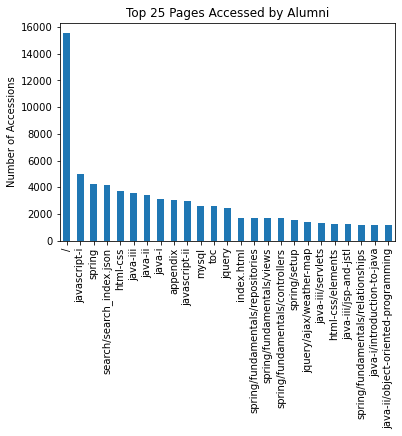

In [73]:
# Examining what is popular with alumni across all programs
alumni.path.value_counts().head(25).plot(kind='bar')
plt.ylabel('Number of Accessions')
plt.title('Top 25 Pages Accessed by Alumni')

In [36]:
# php alumni are coming back to javascript-i
php_alumni.path.value_counts().head()

/               1681
index.html      1011
javascript-i     736
html-css         542
spring           501
Name: path, dtype: int64

In [37]:
# 'Java Full Stack Web Dev' alumni are coming back to javascript-i
java_alumni.path.value_counts().head()

/                           12406
javascript-i                 4229
spring                       3760
search/search_index.json     3562
html-css                     3136
Name: path, dtype: int64

In [38]:
# 'Data Science' alumni are coming back to sql/mysql-overview
ds_alumni.path.value_counts().head()

/                                           1436
search/search_index.json                     493
sql/mysql-overview                           275
classification/overview                      266
classification/scale_features_or_not.svg     219
Name: path, dtype: int64

In [39]:
# 'Front End Web Dev' accessions all seem to be after graduation
front_alumni.path.value_counts().head()

content/html-css                               2
content/html-css/introduction.html             1
content/html-css/gitbook/images/favicon.ico    1
/                                              1
Name: path, dtype: int64

### Alumni are continuing to reference the following topics after graduation:
- 'PHP Full Srack Web Dev' alumni are coming back to javascript-i
- 'Java Full Stack Web Dev' alumni are coming back to javascript-i
- 'Data Science' alumni are coming back to sql/mysql-overview
- 'Front End Web Dev' accessions all seem to be after graduation

### 4. Are there students who, when active, hardly access the curriculum? If so, what information do you have about these students?

In [40]:
# There are some users who rarely access the curriculum
accessions = df.user_id.value_counts()
accessions

11     17913
64     16347
53     12329
314     7783
1       7404
       ...  
652        1
918        1
649        1
952        1
212        1
Name: user_id, Length: 981, dtype: int64

In [41]:
avg_accessions = np.mean(accessions)
avg_accessions

917.6585117227319

In [65]:
# The standard deviation is bigger than the mean, which adds additional challenges
std_accessions = np.std(accessions)
std_accessions

1208.2550769139373

Text(0.5, 1.0, 'Significant Variance in Accessions Between Users')

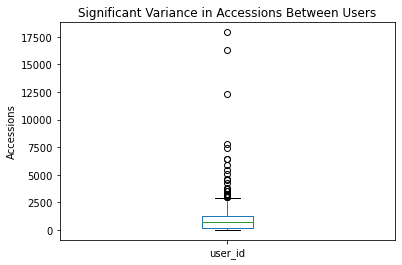

In [74]:
# There are many huge outliers, so we need to careful about our methods
accessions.plot(kind='box')
plt.ylabel('Accessions')
plt.title('Significant Variance in Accessions Between Users')

In [44]:
# The mode of users accessing the curiculum is 1
stat.mode(accessions)

1

In [45]:
not_reading_users = accessions[accessions == 1]
not_reading_users

66     1
593    1
619    1
165    1
940    1
879    1
592    1
163    1
652    1
918    1
649    1
952    1
212    1
Name: user_id, dtype: int64

In [46]:
print('Fraction of users who only accessed the curiculum once: ', 
      len(not_reading_users) / len(accessions))

Fraction of users who only accessed the curiculum once:  0.013251783893985729


In [47]:
# Dataframe filtered for users who only accessed the curriculum once
infrequent_users_df = df[df.user_id.isin(not_reading_users)]
infrequent_users_df

,date,time,path,user_id,cohort_id,ip,id,name,slack,start_date,end_date,created_at,updated_at,program_id,course_name,course_subdomain,hour,weekday
datetime,,,,,,,,,,,,,,,,,,
2018-01-26 09:55:03-06:00,2018-01-26,09:55:03,/,1,8.0,97.105.19.61,8.0,Hampton,#hampton,2015-09-22,2016-02-06,2016-06-14 19:52:26,2016-06-14 19:52:26,1.0,PHP Full Srack Web Dev,php,9,Friday
2018-01-26 09:56:02-06:00,2018-01-26,09:56:02,java-ii,1,8.0,97.105.19.61,8.0,Hampton,#hampton,2015-09-22,2016-02-06,2016-06-14 19:52:26,2016-06-14 19:52:26,1.0,PHP Full Srack Web Dev,php,9,Friday
2018-01-26 09:56:05-06:00,2018-01-26,09:56:05,java-ii/object-oriented-programming,1,8.0,97.105.19.61,8.0,Hampton,#hampton,2015-09-22,2016-02-06,2016-06-14 19:52:26,2016-06-14 19:52:26,1.0,PHP Full Srack Web Dev,php,9,Friday
2018-01-26 09:56:06-06:00,2018-01-26,09:56:06,slides/object_oriented_programming,1,8.0,97.105.19.61,8.0,Hampton,#hampton,2015-09-22,2016-02-06,2016-06-14 19:52:26,2016-06-14 19:52:26,1.0,PHP Full Srack Web Dev,php,9,Friday
2018-01-26 10:40:15-06:00,2018-01-26,10:40:15,javascript-i/functions,1,8.0,97.105.19.61,8.0,Hampton,#hampton,2015-09-22,2016-02-06,2016-06-14 19:52:26,2016-06-14 19:52:26,1.0,PHP Full Srack Web Dev,php,10,Friday
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2021-04-21 09:13:54-05:00,2021-04-21,09:13:54,python/dataframes,1,28.0,70.121.199.82,28.0,Staff,#,2014-02-04,2014-02-04,2018-12-06 17:04:19,2018-12-06 17:04:19,2.0,Java Full Stack Web Dev,java,9,Wednesday
2021-04-21 10:32:19-05:00,2021-04-21,10:32:19,/,1,28.0,70.121.199.82,28.0,Staff,#,2014-02-04,2014-02-04,2018-12-06 17:04:19,2018-12-06 17:04:19,2.0,Java Full Stack Web Dev,java,10,Wednesday
2021-04-21 10:32:22-05:00,2021-04-21,10:32:22,sql/mysql-overview,1,28.0,70.121.199.82,28.0,Staff,#,2014-02-04,2014-02-04,2018-12-06 17:04:19,2018-12-06 17:04:19,2.0,Java Full Stack Web Dev,java,10,Wednesday


Text(0.5, 1.0, 'Time of Activity')

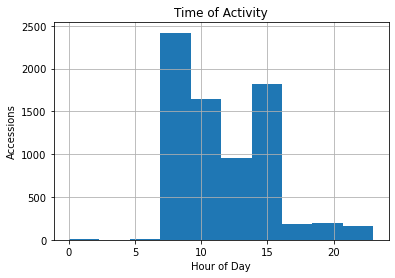

In [77]:
# The infrequent users don't have odd hours of use
infrequent_users_df.hour.hist()
plt.ylabel('Accessions')
plt.xlabel('Hour of Day')
plt.title('Time of Activity')

In [49]:
# This users start date and end date are the same
df[df.user_id == 652]

,date,time,path,user_id,cohort_id,ip,id,name,slack,start_date,end_date,created_at,updated_at,program_id,course_name,course_subdomain,hour,weekday
datetime,,,,,,,,,,,,,,,,,,
2020-05-18 09:56:10-05:00,2020-05-18,09:56:10,loguout,652,28.0,71.150.217.33,28.0,Staff,#,2014-02-04,2014-02-04,2018-12-06 17:04:19,2018-12-06 17:04:19,2.0,Java Full Stack Web Dev,java,9,Monday


In [50]:
# This users start date and end date are separated by only 2 months
# The created_at date is 2 years after the start date
df[df.user_id == 212]

,date,time,path,user_id,cohort_id,ip,id,name,slack,start_date,end_date,created_at,updated_at,program_id,course_name,course_subdomain,hour,weekday
datetime,,,,,,,,,,,,,,,,,,
2018-06-19 09:21:08-05:00,2018-06-19,09:21:08,students/units/75/sub_units/268,212,1.0,170.248.173.247,1.0,Arches,#arches,2014-02-04,2014-04-22,2016-06-14 19:52:26,2016-06-14 19:52:26,1.0,PHP Full Srack Web Dev,php,9,Tuesday


In [51]:
infrequent_duration = (infrequent_users_df.end_date - infrequent_users_df.start_date).mean()
print('Average duration of enrollment for infrequent users: ', infrequent_duration)

Average duration of enrollment for infrequent users:  29 days 22:05:03.403565640


### Users who only accessed the curiculum once had an average enrollment period of less than one month.

### 5. Is there any suspicious activity, such as users/machines/etc accessing the curriculum who shouldn’t be? Does it appear that any web-scraping is happening? Are there any suspicious IP addresses?

In [52]:
df.user_id.value_counts().head(10)

11     17913
64     16347
53     12329
314     7783
1       7404
495     6451
581     6434
428     5897
344     5460
248     5075
Name: user_id, dtype: int64

In [53]:
# Some of the users access the curiculum far more often than the mean
df.user_id.value_counts().mean()

917.6585117227319

In [54]:
# The is great variation among the users
df.user_id.value_counts().std()

1208.8713764066604

In [56]:
# Organizing accessions by ip address
pings_from_ip = df.groupby('ip').count()['path'].sort_values(ascending=False)

# multiplier for the standard deviation
mult = 3

# ip addresses whose activity is 3 standard deviations above the mean
anomalous_ip = pings_from_ip[pings_from_ip > 
                             (pings_from_ip.mean() + mult * pings_from_ip.std())]
anomalous_ip.head()

ip
97.105.19.58    284579
97.105.19.61     61662
Name: path, dtype: int64

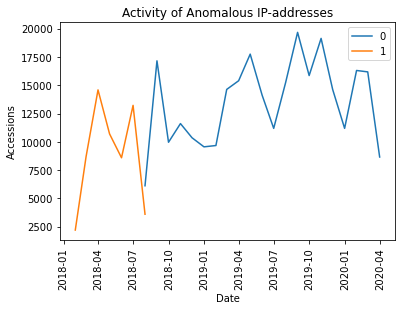

In [80]:
# Plotting the activity of the two anomalous ip addresses
for idx in range(2):
    plt.plot(df[df.ip == anomalous_ip.index[idx]].resample('M').count().iloc[:,0])
plt.legend(range(2))
plt.xticks(rotation = 90) # Rotates the x labels so that they don't overlap
plt.ylabel('Accessions')
plt.xlabel('Date')
plt.title('Activity of Anomalous IP-addresses')
plt.show()

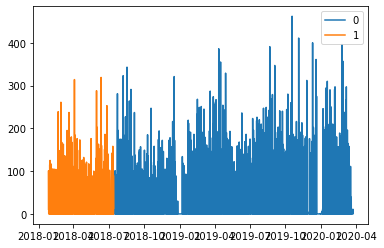

In [58]:
# Plotting the activity of anomalous ip adresses with increased granularity;
# by hour instead of by day
for idx in range(2):
    plt.plot(df[df.ip == anomalous_ip.index[idx]].resample('60Min').count().iloc[:,0])
plt.legend(range(2))
plt.show()

Two ip addresses have anomalous behavior, which is defined as three standard deviations above the mean. <br>
They are requesting pages at a rate too fast for students to read ( up to 400 accessions in an hour). <br>
They also have high activity over a long term.

In [59]:
# Examining the first anomalous ip address

# Multiple user id's
# Multiple cohorts for those ip adresses
# User_id and Cohort seem to change at the same time.
# Sometimes there are multiple users within the same cohort.
df[df.ip == '97.105.19.58']

,date,time,path,user_id,cohort_id,ip,id,name,slack,start_date,end_date,created_at,updated_at,program_id,course_name,course_subdomain,hour,weekday
datetime,,,,,,,,,,,,,,,,,,
2018-07-16 07:51:57-05:00,2018-07-16,07:51:57,javascript-ii/promises,211,1.0,97.105.19.58,1.0,Arches,#arches,2014-02-04,2014-04-22,2016-06-14 19:52:26,2016-06-14 19:52:26,1.0,PHP Full Srack Web Dev,php,7,Monday
2018-07-16 07:58:03-05:00,2018-07-16,07:58:03,javascript-ii/map-filter-reduce,211,1.0,97.105.19.58,1.0,Arches,#arches,2014-02-04,2014-04-22,2016-06-14 19:52:26,2016-06-14 19:52:26,1.0,PHP Full Srack Web Dev,php,7,Monday
2018-07-16 07:59:50-05:00,2018-07-16,07:59:50,javascript-ii/promises,211,1.0,97.105.19.58,1.0,Arches,#arches,2014-02-04,2014-04-22,2016-06-14 19:52:26,2016-06-14 19:52:26,1.0,PHP Full Srack Web Dev,php,7,Monday
2018-07-16 08:07:37-05:00,2018-07-16,08:07:37,index.html,53,14.0,97.105.19.58,14.0,Lassen,#lassen,2016-07-18,2016-11-10,2016-07-18 19:06:27,2016-07-18 19:06:27,1.0,PHP Full Srack Web Dev,php,8,Monday
2018-07-16 08:07:41-05:00,2018-07-16,08:07:41,javascript-ii,53,14.0,97.105.19.58,14.0,Lassen,#lassen,2016-07-18,2016-11-10,2016-07-18 19:06:27,2016-07-18 19:06:27,1.0,PHP Full Srack Web Dev,php,8,Monday
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2020-03-23 15:10:09-05:00,2020-03-23,15:10:09,toc,625,57.0,97.105.19.58,57.0,Ganymede,#ganymede,2020-03-23,2020-08-20,2020-03-23 17:52:16,2020-03-23 17:52:16,2.0,Java Full Stack Web Dev,java,15,Monday
2020-03-23 15:10:18-05:00,2020-03-23,15:10:18,toc,623,57.0,97.105.19.58,57.0,Ganymede,#ganymede,2020-03-23,2020-08-20,2020-03-23 17:52:16,2020-03-23 17:52:16,2.0,Java Full Stack Web Dev,java,15,Monday
2020-03-23 15:20:39-05:00,2020-03-23,15:20:39,/,627,57.0,97.105.19.58,57.0,Ganymede,#ganymede,2020-03-23,2020-08-20,2020-03-23 17:52:16,2020-03-23 17:52:16,2.0,Java Full Stack Web Dev,java,15,Monday


In [60]:
# Examining the second anomalous ip address

# Multiple user id's
# Multiple cohorts for those users
# User_id and Cohort seem to change at the same time.
df[df.ip == '97.105.19.61']

,date,time,path,user_id,cohort_id,ip,id,name,slack,start_date,end_date,created_at,updated_at,program_id,course_name,course_subdomain,hour,weekday
datetime,,,,,,,,,,,,,,,,,,
2018-01-26 09:55:03-06:00,2018-01-26,09:55:03,/,1,8.0,97.105.19.61,8.0,Hampton,#hampton,2015-09-22,2016-02-06,2016-06-14 19:52:26,2016-06-14 19:52:26,1.0,PHP Full Srack Web Dev,php,9,Friday
2018-01-26 09:56:02-06:00,2018-01-26,09:56:02,java-ii,1,8.0,97.105.19.61,8.0,Hampton,#hampton,2015-09-22,2016-02-06,2016-06-14 19:52:26,2016-06-14 19:52:26,1.0,PHP Full Srack Web Dev,php,9,Friday
2018-01-26 09:56:05-06:00,2018-01-26,09:56:05,java-ii/object-oriented-programming,1,8.0,97.105.19.61,8.0,Hampton,#hampton,2015-09-22,2016-02-06,2016-06-14 19:52:26,2016-06-14 19:52:26,1.0,PHP Full Srack Web Dev,php,9,Friday
2018-01-26 09:56:06-06:00,2018-01-26,09:56:06,slides/object_oriented_programming,1,8.0,97.105.19.61,8.0,Hampton,#hampton,2015-09-22,2016-02-06,2016-06-14 19:52:26,2016-06-14 19:52:26,1.0,PHP Full Srack Web Dev,php,9,Friday
2018-01-26 09:56:24-06:00,2018-01-26,09:56:24,javascript-i/conditionals,2,22.0,97.105.19.61,22.0,Teddy,#teddy,2018-01-08,2018-05-17,2018-01-08 13:59:10,2018-01-08 13:59:10,2.0,Java Full Stack Web Dev,java,9,Friday
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2018-07-13 16:30:55-05:00,2018-07-13,16:30:55,slides/object_oriented_programming,26,18.0,97.105.19.61,18.0,Pinnacles,#pinnacles,2017-03-27,2017-07-20,2017-03-28 00:33:12,2017-03-28 00:33:12,2.0,Java Full Stack Web Dev,java,16,Friday
2018-07-13 16:38:26-05:00,2018-07-13,16:38:26,/,130,23.0,97.105.19.61,23.0,Ulysses,#ulysses,2018-03-05,2018-07-19,2018-03-05 14:22:11,2018-03-05 14:22:11,2.0,Java Full Stack Web Dev,java,16,Friday
2018-07-13 16:38:29-05:00,2018-07-13,16:38:29,spring,130,23.0,97.105.19.61,23.0,Ulysses,#ulysses,2018-03-05,2018-07-19,2018-03-05 14:22:11,2018-03-05 14:22:11,2.0,Java Full Stack Web Dev,java,16,Friday


### There are two anomalous ip addresses, which is defined as activity more than three standard deviations above the mean.
### The likely explanation for the two anomalous ip addresses is that they belong to shared computers being used by multiple students over multiple cohorts.
### I would recommend determining if these two machines belong to the school.